<a href="https://colab.research.google.com/github/neermesh/deep-learning/blob/master/tensorflow_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [0]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')


    
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

In [0]:
#ls gdrive/My\ Drive

In [0]:
#dataset_train = pd.read_csv('gdrive/My Drive/NSE-TATAGLOBAL.csv')
#training_set = dataset_train.iloc[:,1:2].values

In [0]:
from pandas_datareader import data as pdr
df = pdr.get_data_yahoo('CIPLA.NS')  


In [0]:
df = df['Adj Close'].values

In [15]:
df

array([319.54006958, 313.81295776, 326.49798584, ..., 465.1499939 ,
       464.45001221, 464.70001221])

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
dfsc = sc.fit_transform(df.reshape(-1, 1))

In [21]:
dfsc

array([[0.1185142 ],
       [0.10611447],
       [0.13357873],
       ...,
       [0.43377305],
       [0.43225753],
       [0.4327988 ]])

In [23]:
test_size = 30
simulation_size = 10

df_train = dfsc[:-test_size]
df_test = dfsc[-test_size:]
df.shape, df_train.shape, df_test.shape

((2480,), (2450, 1), (30, 1))

In [0]:
#HERE

In [0]:
X_train = []
y_train = []
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)

In [30]:
X_train

array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
        0.15815085],
       [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
        0.16504461],
       [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
        0.15896188]])

In [31]:
y_train

array([0.77007299, 0.73641525, 0.73763179, ..., 0.16504461, 0.15896188,
       0.16626115])

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from tensorflow.keras import layers

In [8]:


regressor = tf.keras.Sequential()
#regressor.add(layers.Bidirectional(layers.CuDNNLSTM(256, return_sequences=True), 
#                               input_shape=(X_train.shape[1],1)))

regressor.add(layers.LSTM(32, input_shape=(X_train.shape[1],1), return_sequences=True))
regressor.add(layers.Dropout(0.2))




regressor.add(layers.LSTM(4, return_sequences=True))
regressor.add(layers.Dropout(0.2))

regressor.add(layers.Flatten())

regressor.add(layers.Dense(1))
regressor.compile(optimizer='adam',loss='mean_squared_error')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 32)            4352      
_________________________________________________________________
dropout (Dropout)            (None, 60, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 4)             592       
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 4)             0         
_________________________________________________________________
flatten (Flatten)            (None, 240)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 241       
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
______________________________________________________

In [10]:
regressor.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1580 samples, validate on 395 samples
Epoch 1/30
1580/1580 [==============================] - 6s 4ms/sample - loss: 0.0335 - val_loss: 0.0054
Epoch 2/30
1580/1580 [==============================] - 4s 3ms/sample - loss: 0.0108 - val_loss: 0.0046
Epoch 3/30
1580/1580 [==============================] - 4s 3ms/sample - loss: 0.0093 - val_loss: 0.0057
Epoch 4/30
1580/1580 [==============================] - 4s 3ms/sample - loss: 0.0080 - val_loss: 0.0035
Epoch 5/30
1580/1580 [==============================] - 4s 3ms/sample - loss: 0.0071 - val_loss: 0.0046
Epoch 6/30
1580/1580 [==============================] - 4s 3ms/sample - loss: 0.0069 - val_loss: 0.0034
Epoch 7/30
1580/1580 [==============================] - 4s 3ms/sample - loss: 0.0066 - val_loss: 0.0033
Epoch 8/30
1580/1580 [==============================] - 4s 3ms/sample - loss: 0.0063 - val_loss: 0.0029
Epoch 9/30
1580/1580 [=====

In [0]:
dataset_test = pd.read_csv('gdrive/My Drive/tatatest.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,76):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

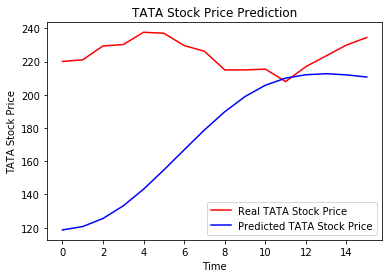

In [0]:


# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [0]:
pd.DataFrame({'real':real_stock_price.tolist(),'predicted':predicted_stock_price.tolist()})

,real,predicted
0,[220.1],[118.64737701416016]
1,[221.1],[120.67568969726562]
2,[229.45],[125.53271484375]
3,[230.3],[133.1756134033203]
4,[237.7],[143.20205688476562]
5,[237.1],[154.78924560546875]
6,[229.7],[166.8763427734375]
7,[226.25],[178.84393310546875]
8,[215.0],[189.8040008544922]
9,[215.0],[198.9826202392578]
